In [1]:
from ctc_utils.functions import def_gen_expr_for_datasets, def_labels_for_datasets, load_data, prune_training_set
from sklearn.feature_selection import VarianceThreshold
from classifiers.DTC import dtc
from classifiers.LogisticRegression import logreg
from classifiers.LinearSVC import lsvc
from classifiers.kNN import knn
from classifiers.MLP import mlp
from classifiers.NB import gnb
from classifiers.SDGC import sdg
from classifiers.StackedClassifiers import stackedClassifier
from classifiers.hierarchical_classifier import hierarchical_classifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from collections import  Counter
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN,  SMOTEN


# Combine datasets from different protocols

Prepare training and test sets

In [3]:
# Load data
cell_names, gene_names, labels, gene_expr_bin = load_data()

#Training datasets
training_datasets = [gene_expr_bin[6444:23153],
 np.concatenate((gene_expr_bin[0:6443], gene_expr_bin[6697:23153])), 
 np.concatenate((gene_expr_bin[0:6696], gene_expr_bin[9919:23153])),
 np.concatenate((gene_expr_bin[0:9918], gene_expr_bin[10172:23153])),
 np.concatenate((gene_expr_bin[0:10171], gene_expr_bin[13394:23153])), 
 np.concatenate((gene_expr_bin[0:13393], gene_expr_bin[16616:23153])),
 np.concatenate((gene_expr_bin[0:16615], gene_expr_bin[19792:23153])),
 gene_expr_bin[0:19791]    
 ]

# Test Datasets
# [ge_10xv2, ge_SM2, ge_10xv3, ge_CL, ge_DR, ge_iD, ge_SW, ge_10xv2_2]
test_datasets = def_gen_expr_for_datasets(gene_expr_bin)


labels_for__training_datasets = [labels[6444:23153],
 np.concatenate((labels[0:6443], labels[6697:23153])), 
 np.concatenate((labels[0:6696], labels[9919:23153])),
 np.concatenate((labels[0:9918], labels[10172:23153])),
 np.concatenate((labels[0:10171], labels[13394:23153])), 
 np.concatenate((labels[0:13393], labels[16616:23153])),
 np.concatenate((labels[0:16615], labels[19792:23153])),
 labels[0:19791]    
 ]

# Labels for test datasets
# [lb_10xv2, lb_SM2, lb_10xv3, lb_CL, lb_DR, lb_iD, lb_SW, lb_10xv2_2]
labels_for_test_datasets = def_labels_for_datasets(labels)


acc_matrix = np.zeros(9)

all_matrix = np.zeros(shape = (8,9))

# Classification

Uncommend commented part to balance the class imbalance.

In [4]:
for i, x_train in enumerate(training_datasets):
    
    y_train = labels_for__training_datasets[i]
    x_test = test_datasets[i]
    y_test = labels_for_test_datasets[i]

    ##########################################################################
    # Fix imbalance
    # Find out the majority class and its occurances
    # d = Counter(y_train)
    # max_occurances = max(d, key=d. get)
    # max_num = d.get(max_occurances)
    # half = int(max_num/2)

    # All classes have occurances equal to the half of the majority class
    # x_train, y_train = prune_training_set(x_train, y_train, half)

    # Feature selection
    sel = VarianceThreshold(threshold=0.16)
    x_train = sel.fit_transform(x_train)
    x_test = sel.transform(x_test)

    # Apply oversampling
    #over_sampling = RandomOverSampler(sampling_strategy = "not majority")
    # fit and apply the transform
    # x_train, y_train = over_sampling.fit_resample(x_train, y_train)
    ##########################################################################
    
    print("classification...")    

    #Apply knn
    model, acc_knn = knn(x_train, y_train, x_test,y_test)

    #Apply logistic regression
    model, acc_logreg = logreg(x_train, y_train, x_test, y_test)

    #Apply Decision Tree Classifier
    model, acc_dtc = dtc(x_train, y_train, x_test, y_test)

    #Apply LinearSVC Classifier
    model, acc_lsvc = lsvc(x_train, y_train, x_test, y_test)

    #Apply MLP
    model, acc_mlp = mlp(x_train, y_train, x_test, y_test)

    #Apply GaussianNB
    model, acc_gnb = gnb(x_train, y_train, x_test, y_test)

    #Apply SDGC
    model, acc_sdg = sdg(x_train, y_train, x_test, y_test)
    
    #Apply hierarchical ckasassufier
    model, acc_hc = hierarchical_classifier(x_train, y_train, x_test, y_test)

    #Apply ensemble methods
    acc_stacked = stackedClassifier(x_train, y_train, x_test, y_test)


    #contains alll weighted f1 scores
    all_acc_within_dataset = np.array([acc_knn, acc_logreg, acc_dtc, acc_lsvc, acc_mlp, acc_gnb, acc_sdg,acc_hc,acc_stacked])

    acc_matrix = all_acc_within_dataset

    all_matrix[i] = acc_matrix
    print(all_matrix)

classification...
[Pipeline] ............. (step 1 of 2) Processing trsvd, total=   1.3s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.0s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 1 of 2) Processing fa, total=   5.2s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[Pipeline] ................. (step 2 of 2) Processing m, total=   9.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[[0.84226821 0.89167462 0.80765205 0.89329394 0.86542579 0.8771209
  0.89634419 0.89818618 0.86464048]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
classification...
[Pipeline] ............. (step 1 of 2) Processing trsvd, total=   2.9s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.0s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 1 of 2) Processing fa, total=  11.0s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[Pipeline] ................. (step 2 of 2) Processing m, total=  19.1s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[[0.84226821 0.89167462 0.80765205 0.89329394 0.86542579 0.8771209
  0.89634419 0.89818618 0.86464048]
 [0.90195098 0.85844602 0.70132102 0.88113774 0.84547819 0.68514395
  0.74807173 0.88690308 0.92209201]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
classification...
[Pipeline] ............. (step 1 of 2) Processing trsvd, total=   1.3s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.0s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 1 of 2) Processing fa, total=   5.5s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[Pipeline] ................. (step 2 of 2) Processing m, total=  16.7s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[[0.84226821 0.89167462 0.80765205 0.89329394 0.86542579 0.8771209
  0.89634419 0.89818618 0.86464048]
 [0.90195098 0.85844602 0.70132102 0.88113774 0.84547819 0.68514395
  0.74807173 0.88690308 0.92209201]
 [0.85184716 0.90090913 0.80134014 0.89641058 0.87902441 0.80560906
  0.85238653 0.90477943 0.90862906]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
classification...
[Pipeline] ............. (step 1 of 2) Processing trsvd, total=   2.4s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.1s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 1 of 2) Processing fa, total=   7.3s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[Pipeline] ................. (step 2 of 2) Processing m, total=  18.7s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[[0.84226821 0.89167462 0.80765205 0.89329394 0.86542579 0.8771209
  0.89634419 0.89818618 0.86464048]
 [0.90195098 0.85844602 0.70132102 0.88113774 0.84547819 0.68514395
  0.74807173 0.88690308 0.92209201]
 [0.85184716 0.90090913 0.80134014 0.89641058 0.87902441 0.80560906
  0.85238653 0.90477943 0.90862906]
 [0.81608404 0.82549744 0.64830706 0.82322123 0.74176602 0.79710341
  0.80569801 0.79660773 0.73280726]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
classification...
[Pipeline] ............. (step 1 of 2) Processing trsvd, total=   1.5s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.0s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 1 of 2) Processing fa, total=   6.3s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[Pipeline] ................. (step 2 of 2) Processing m, total=  10.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[[0.84226821 0.89167462 0.80765205 0.89329394 0.86542579 0.8771209
  0.89634419 0.89818618 0.86464048]
 [0.90195098 0.85844602 0.70132102 0.88113774 0.84547819 0.68514395
  0.74807173 0.88690308 0.92209201]
 [0.85184716 0.90090913 0.80134014 0.89641058 0.87902441 0.80560906
  0.85238653 0.90477943 0.90862906]
 [0.81608404 0.82549744 0.64830706 0.82322123 0.74176602 0.79710341
  0.80569801 0.79660773 0.73280726]
 [0.80339235 0.83109873 0.75222937 0.84171566 0.81801912 0.84175815
  0.85395765 0.84089764 0.76984001]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
classification...
[Pipeline] ............. (step 1 of 2) Processing trsvd, total=   3.1s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.0s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 1 of 2) Processing fa, total=   7.6s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[Pipeline] ................. (step 2 of 2) Processing m, total=  13.0s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[[0.84226821 0.89167462 0.80765205 0.89329394 0.86542579 0.8771209
  0.89634419 0.89818618 0.86464048]
 [0.90195098 0.85844602 0.70132102 0.88113774 0.84547819 0.68514395
  0.74807173 0.88690308 0.92209201]
 [0.85184716 0.90090913 0.80134014 0.89641058 0.87902441 0.80560906
  0.85238653 0.90477943 0.90862906]
 [0.81608404 0.82549744 0.64830706 0.82322123 0.74176602 0.79710341
  0.80569801 0.79660773 0.73280726]
 [0.80339235 0.83109873 0.75222937 0.84171566 0.81801912 0.84175815
  0.85395765 0.84089764 0.76984001]
 [0.64778025 0.81932739 0.65596774 0.81243627 0.75224811 0.7279371
  0.76583187 0.81240548 0.75183162]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
classification...
[Pipeline] ............. (step 1 of 2) Processing trsvd, total=   1.5s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.0s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 1 of 2) Processing fa, total=   4.8s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[Pipeline] ................. (step 2 of 2) Processing m, total=  11.0s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[[0.84226821 0.89167462 0.80765205 0.89329394 0.86542579 0.8771209
  0.89634419 0.89818618 0.86464048]
 [0.90195098 0.85844602 0.70132102 0.88113774 0.84547819 0.68514395
  0.74807173 0.88690308 0.92209201]
 [0.85184716 0.90090913 0.80134014 0.89641058 0.87902441 0.80560906
  0.85238653 0.90477943 0.90862906]
 [0.81608404 0.82549744 0.64830706 0.82322123 0.74176602 0.79710341
  0.80569801 0.79660773 0.73280726]
 [0.80339235 0.83109873 0.75222937 0.84171566 0.81801912 0.84175815
  0.85395765 0.84089764 0.76984001]
 [0.64778025 0.81932739 0.65596774 0.81243627 0.75224811 0.7279371
  0.76583187 0.81240548 0.75183162]
 [0.70139327 0.76336922 0.64165788 0.74922912 0.71283278 0.72568033
  0.70967546 0.73799681 0.75239169]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
classification...
[Pipeline] ............. (step 1 of 2) Processing trsvd, total=   1.5s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.0s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 1 of 2) Processing fa, total=   5.4s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[Pipeline] ................. (step 2 of 2) Processing m, total=  10.0s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[[0.84226821 0.89167462 0.80765205 0.89329394 0.86542579 0.8771209
  0.89634419 0.89818618 0.86464048]
 [0.90195098 0.85844602 0.70132102 0.88113774 0.84547819 0.68514395
  0.74807173 0.88690308 0.92209201]
 [0.85184716 0.90090913 0.80134014 0.89641058 0.87902441 0.80560906
  0.85238653 0.90477943 0.90862906]
 [0.81608404 0.82549744 0.64830706 0.82322123 0.74176602 0.79710341
  0.80569801 0.79660773 0.73280726]
 [0.80339235 0.83109873 0.75222937 0.84171566 0.81801912 0.84175815
  0.85395765 0.84089764 0.76984001]
 [0.64778025 0.81932739 0.65596774 0.81243627 0.75224811 0.7279371
  0.76583187 0.81240548 0.75183162]
 [0.70139327 0.76336922 0.64165788 0.74922912 0.71283278 0.72568033
  0.70967546 0.73799681 0.75239169]
 [0.863688   0.8954476  0.84459987 0.89074983 0.88509159 0.87762633
  0.89566192 0.90824994 0.87842768]]


# Save results matrix to disk

In [5]:
np.save("../results/performance_matrices/ctc_non_balanced_res", all_matrix)

# Load results matrix from disk

In [2]:
import numpy as np
all_matrix = np.load("../results/performance_matrices/ctc_non_balanced_res.npy")

# Plotting

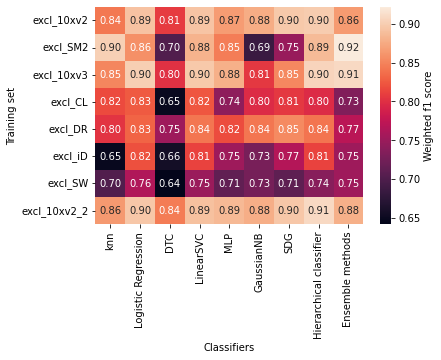

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt   

y_labels = ["excl_10xv2", "excl_SM2", "excl_10xv3", "excl_CL", "excl_DR", "excl_iD", "excl_SW", "excl_10xv2_2"]
x_labels = ["knn", "Logistic Regression", "DTC", "LinearSVC", "MLP", "GaussianNB", "SDG", "Hierarchical classifier", "Ensemble methods" ]

ax = sns.heatmap(all_matrix, annot=True, fmt=".2f", cbar_kws={'label': 'Weighted f1 score'})  
# labels, title and ticks
ax.xaxis.set_ticklabels(x_labels, rotation = 90)
plt.ylabel("Training set")
plt.xlabel("Classifiers")
ax.yaxis.set_ticklabels(y_labels, rotation = 0)
fig1 = plt.gcf()
fig1.savefig("../results/report_pdf_results/ctc_non_balanced.pdf", format='pdf', bbox_inches='tight')
plt.show()


(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

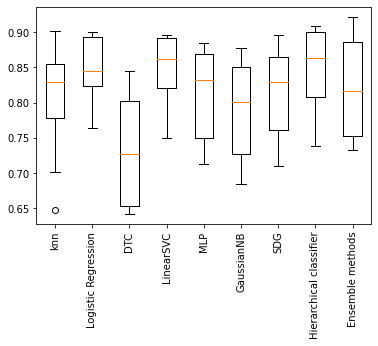

In [8]:
plt.boxplot(all_matrix, labels = x_labels)
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

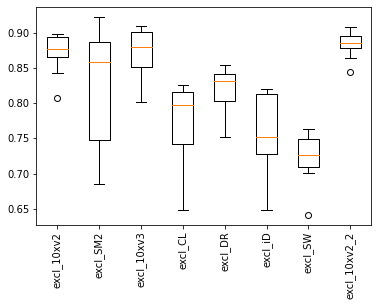

In [9]:
plt.boxplot(all_matrix.T, labels = y_labels)
plt.xticks(rotation=90)
